In [1]:
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
sp500_tickers = [
    "A", "AAL", "AAP", "AAPL", "ABBV", "ABC", "ABMD", "ABT", "ACN", "ADBE",
    "ADI", "ADM", "ADP", "ADSK", "AEE", "AEP", "AES", "AFL", "AIG", "AIZ",
    "AJG", "AKAM", "ALB", "ALGN", "ALK", "ALL", "ALLE", "AMAT", "AMCR", "AMD",
    "AME", "AMGN", "AMP", "AMT", "AMZN", "ANET", "ANSS", "ANTM", "AON", "AOS",
    "APA", "APD", "APH", "APTV", "ARE", "ATO", "ATVI", "AVB", "AVGO", "AVY",
    "AWK", "AXP", "AZO", "BA", "BAC", "BALL", "BAX", "BBWI", "BBY", "BDX",
    "BEN", "BF.B", "BIIB", "BIO", "BK", "BKNG", "BKR", "BLK", "BLL", "BMY",
    "BR", "BRK.B", "BRO", "BSX", "BWA", "BXP", "C", "CAG", "CAH", "CARR",
    "CAT", "CB", "CBOE", "CBRE", "CCI", "CCL", "CDAY", "CDNS", "CDW", "CE",
    "CEG", "CF", "CFG", "CHD", "CHRW", "CHTR", "CI", "CINF", "CL", "CLX",
    "CMA", "CMCSA", "CME", "CMG", "CMI", "CMS", "CNC", "CNP", "COF", "COO",
    "COP", "COST", "CPB", "CPRT", "CRL", "CRM", "CSCO", "CSX", "CTAS", "CTLT",
    "CTRA", "CTSH", "CTVA", "CTXS", "CVS", "CVX", "CZR", "D", "DAL", "DD",
    "DE", "DFS", "DG", "DGX", "DHI", "DHR", "DIS", "DISCA", "DISH", "DLR",
    "DLTR", "DOV", "DOW", "DPZ", "DRE", "DRI", "DTE", "DUK", "DVA", "DVN",
    "DXC", "DXCM", "EA", "EBAY", "ECL", "ED", "EFX", "EIX", "EL", "ELV", "EMN",
    "EMR", "ENPH", "EOG", "EPAM", "EQIX", "EQR", "ES", "ESS", "ETN", "ETR",
    "ETSY", "EVRG", "EW", "EXC", "EXPD", "EXPE", "EXR", "F", "FANG", "FAST",
    "FBHS", "FCX", "FDS", "FDX", "FE", "FFIV", "FIS", "FISV", "FITB", "FLT",
    "FMC", "FOX", "FOXA", "FRC", "FRT", "FTNT", "FTV", "GD", "GE", "GILD",
    "GIS", "GL", "GLW", "GM", "GNRC", "GOOG", "GOOGL", "GPC", "GPN", "GPS",
    "GRMN", "GS", "GWW", "HAL", "HAS", "HBAN", "HCA", "HD", "HES", "HIG",
    "HII", "HLF", "HLT", "HOLX", "HON", "HPE", "HPQ", "HRL", "HSIC", "HST",
    "HSY", "HUM", "HWM", "IBM", "ICE", "IDXX", "IFF", "IHRT", "ILMN", "INCY",
    "INFO", "INTC", "INTU", "IP", "IPG", "IPGP", "IQV", "IR", "IRM", "ISRG",
    "IT", "ITW", "IVZ", "J", "JBHT", "JCI", "JKHY", "JNJ", "JNPR", "JPM",
    "K", "KEY", "KEYS", "KHC", "KIM", "KLAC", "KMB", "KMI", "KMX", "KO",
    "KR", "L", "LDOS", "LEA", "LEG", "LEN", "LH", "LHX", "LIN", "LKQ", "LLY",
    "LMT", "LNC", "LNT", "LOW", "LRCX", "LUMN", "LUV", "LVS", "LW", "LYB",
    "LYV", "MA", "MAA", "MAR", "MAS", "MCD", "MCK", "MCO", "MDLZ", "MDT",
    "MET", "MGM", "MHK", "MKC", "MKTX", "MLM", "MMC", "MMM", "MNST", "MO",
    "MOH", "MOS", "MPC", "MPWR", "MRK", "MRNA", "MRO", "MS", "MSCI", "MSFT",
    "MSI", "MTB", "MTD", "MU", "NCLH", "NDAQ", "NEE", "NEM", "NFLX", "NI",
    "NKE", "NLOK", "NLSN", "NOC", "NOV", "NOW", "NRG", "NSC", "NTAP", "NTRS",
    "NUE", "NVDA", "NVR", "NWL", "NXPI", "O", "ODFL", "OGN", "OKE", "OMC",
    "ORCL", "ORLY", "OTIS", "OXY", "PARA", "PAYC", "PAYX", "PBCT", "PCAR",
    "PEAK", "PEG", "PENN", "PEP", "PFE", "PFG", "PG", "PGR", "PH", "PHM",
    "PKG", "PKI", "PLD", "PM", "PNC", "PNR", "PNW", "POOL", "PPG", "PPL",
    "PRGO", "PRU", "PSA", "PSX", "PTC", "PVH", "PWR", "PXD", "PYPL", "QCOM",
    "QRVO", "RCL", "RE", "REG", "REGN", "RF", "RHI", "RJF", "RL", "RMD",
    "ROK", "ROL", "ROP", "ROST", "RSG", "RTX", "SBAC", "SBUX", "SCHW", "SCI",
    "SEE", "SHW", "SIVB", "SJM", "SLB", "SNA", "SNPS", "SO", "SPG", "SPGI",
    "SRE", "STE", "STT", "STX", "STZ", "SWK", "SWKS", "SYF", "SYK", "SYY",
    "T", "TAP", "TDG", "TDY", "TEL", "TER", "TFC", "TFX", "TGT", "TJX",
    "TMO", "TMUS", "TPR", "TRMB", "TROW", "TRV", "TSCO", "TSLA", "TSN",
    "TT", "TTWO", "TWTR", "TXN", "TXT", "TYL", "UAA", "UAL", "UDR", "UHS",
    "ULTA", "UNH", "UNM", "UNP", "UPS", "URI", "USB", "V", "VFC", "VLO",
    "VMC", "VNO", "VRSK", "VRSN", "VRTX", "VTR", "VTRS", "VZ", "WAB", "WAT",
    "WBA", "WBD", "WDC", "WEC", "WELL", "WFC", "WHR", "WM", "WMB", "WMT",
    "WRB", "WRK", "WST", "WTW", "WY", "WYNN", "XEL", "XOM", "XRAY", "XYL",
    "YUM", "ZBH", "ZBRA", "ZION", "ZTS"
]

tickers = [
    "AAPL",  # Apple
    "MSFT",  # Microsoft
    "AMZN",  # Amazon
    "GOOGL", # Alphabet (Google) Class A
    "TSLA",  # Tesla
    "NVDA",  # Nvidia
    "JPM",   # JPMorgan Chase
    "V",     # Visa
    "UNH",   # UnitedHealth
    "HD",    # Home Depot
    "PG",    # Procter & Gamble
    "DIS",   # Disney
    "MA",    # Mastercard
    "PYPL",  # PayPal
    "BAC",   # Bank of America
    "ADBE",  # Adobe
    "NFLX",  # Netflix
    "CMCSA", # Comcast
    "XOM",   # Exxon Mobil
    "KO",    # Coca-Cola
    "CSCO",  # Cisco
    "VZ",    # Verizon
    "INTC",  # Intel
    "PEP",   # PepsiCo
    "PFE",   # Pfizer
    "WFC",   # Wells Fargo
    "ABT"    # Abbott Laboratories
]

In [6]:
# Download stopwords and wordnet data
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/victor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
tickerData = yf.Ticker("AMZN")
financials = tickerData.financials
ebit_margin = (financials.loc['EBIT']/financials.loc['Total Revenue']).values.mean()
ebit_margin


0.04833424430606634

In [7]:
ticker_data_list = []
bsumList = []
for ticker in tickers:
    try:
        tickerData = yf.Ticker(ticker)
        info = tickerData.info

        financials = tickerData.financials
        balance_sheet = tickerData.balance_sheet
        cashflow = tickerData.cashflow

        ebit_margin = (financials.loc['EBIT']/financials.loc['Total Revenue']).values.mean()
        capex_to_rev = (cashflow.loc['Capital Expenditure']/financials.loc['Total Revenue']).values.mean()
        tan_price_to_book = info['marketCap']/balance_sheet.loc['Tangible Book Value'].values.mean()
        employee_to_revenue = financials.loc['Total Revenue'][0]/info['fullTimeEmployees']

        ticker_data_list.append([ticker, ebit_margin, capex_to_rev, tan_price_to_book, employee_to_revenue])
        
        businessSummary = info['longBusinessSummary']
        
        bsumList.append([ticker, businessSummary])
        
    except:
        pass

/var/folders/dr/g848f5b55mn9xp6p982hbg280000gn/T/ipykernel_34789/3806676519.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  employee_to_revenue = financials.loc['Total Revenue'][0]/info['fullTimeEmployees']
/var/folders/dr/g848f5b55mn9xp6p982hbg280000gn/T/ipykernel_34789/3806676519.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  employee_to_revenue = financials.loc['Total Revenue'][0]/info['fullTimeEmployees']
/var/folders/dr/g848f5b55mn9xp6p982hbg280000gn/T/ipykernel_34789/3806676519.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will al

In [10]:
stock_df = pd.DataFrame(ticker_data_list, columns=['Ticker', 'ebit_margin', 'capex_to_rev', 'tan_price_to_book', 'employee_to_revenue'])
stock_df = stock_df[['Ticker', 'ebit_margin', 'capex_to_rev', 'employee_to_revenue']]
stock_df

,Ticker,ebit_margin,capex_to_rev,employee_to_revenue
0,AAPL,0.294275,-0.028169,2.380652e+06
1,MSFT,0.422323,-0.120940,9.588914e+05
2,AMZN,0.048334,-0.119250,3.426553e+05
3,GOOGL,0.290378,-0.109676,1.550798e+06
4,TSLA,0.118603,-0.113247,6.371436e+05
5,NVDA,0.273769,-0.054163,1.029699e+06
6,V,0.660904,-0.032116,1.133785e+06
7,HD,0.147223,-0.019933,3.349000e+05
8,PG,0.232661,-0.039156,7.664112e+05
9,DIS,0.053360,-0.057558,5.131198e+05


In [11]:
#reset tickers variable to account for those that couldn't be fetched
accepted_tickers = stock_df['Ticker'].values
accepted_tickers

array(['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'NVDA', 'V', 'HD', 'PG',
       'DIS', 'MA', 'PYPL', 'ADBE', 'CMCSA', 'XOM', 'KO', 'CSCO', 'VZ',
       'INTC', 'PEP', 'PFE', 'ABT'], dtype=object)

In [247]:
# df = pd.DataFrame(bsumList, columns=['Business Summary'])
# df.to_csv('business_summaries.csv', index=False)

In [12]:
business_summaries = [item[1] for item in bsumList]

In [13]:
def preprocess(text):
    # Tokenize, remove stopwords and lemmatize
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(words)

# Apply preprocessing to each summary
preprocessed_summaries = [preprocess(summary) for summary in business_summaries]


In [14]:
# Convert text to numeric features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(preprocessed_summaries)

/Users/victor/anaconda3/envs/new_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/victor/anaconda3/envs/new_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


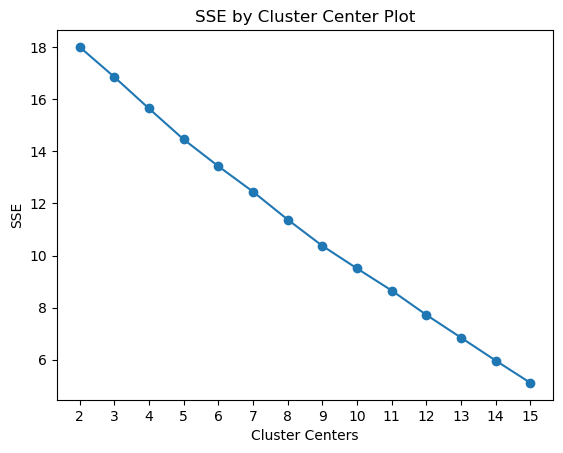

In [15]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1)
    sse = []
    
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X, 15) 

In [16]:
# Apply K-Means clustering
num_clusters = 10 # You might need to find the right number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
# Print out the clusters
initial_cluster = {}
for i in range(num_clusters):
    cluster_list = []
    cluster = np.where(kmeans.labels_ == i)[0]
    print(f"Cluster {i+1}:")
    for company_idx in cluster:
        cluster_list.append(accepted_tickers[company_idx])
        print(f"- {accepted_tickers[company_idx]}")

    initial_cluster[f"Cluster {i+1}"] = cluster_list
print(initial_cluster)


Cluster 1:
- KO
- PEP
Cluster 2:
- GOOGL
Cluster 3:
- NVDA
- INTC
Cluster 4:
- PG
- PFE
- ABT
Cluster 5:
- V
- MA
- PYPL
Cluster 6:
- HD
Cluster 7:
- AAPL
- MSFT
- AMZN
- ADBE
Cluster 8:
- TSLA
- XOM
Cluster 9:
- CSCO
- VZ
Cluster 10:
- DIS
- CMCSA
{'Cluster 1': ['KO', 'PEP'], 'Cluster 2': ['GOOGL'], 'Cluster 3': ['NVDA', 'INTC'], 'Cluster 4': ['PG', 'PFE', 'ABT'], 'Cluster 5': ['V', 'MA', 'PYPL'], 'Cluster 6': ['HD'], 'Cluster 7': ['AAPL', 'MSFT', 'AMZN', 'ADBE'], 'Cluster 8': ['TSLA', 'XOM'], 'Cluster 9': ['CSCO', 'VZ'], 'Cluster 10': ['DIS', 'CMCSA']}


/Users/victor/anaconda3/envs/new_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


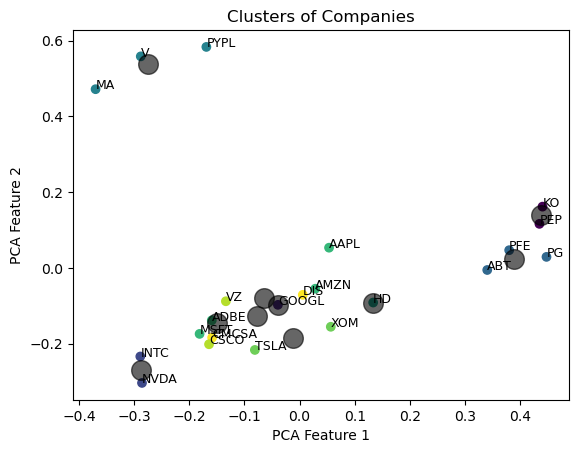

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the dimensionality of the feature space
pca = PCA(n_components=3, random_state=0)
reduced_features = pca.fit_transform(X.toarray())  # X is your TF-IDF matrix

# Plot the reduced data points
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmeans.labels_, cmap='viridis')

# Define the cluster centers
centers = pca.transform(kmeans.cluster_centers_)

# Plot the cluster centers
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.6)

# Adding labels for each point (optional, can be crowded if too many points)
for i, ticker in enumerate(accepted_tickers):
    plt.text(reduced_features[i, 0], reduced_features[i, 1], ticker, fontsize=9)

plt.title('Clusters of Companies')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()


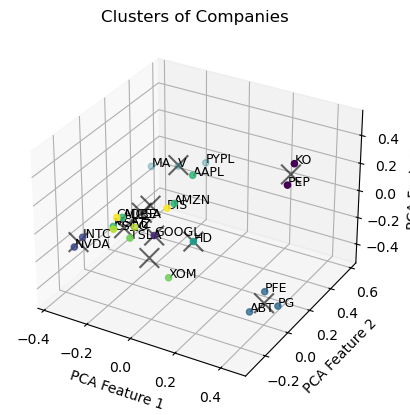

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This is needed for 3D plotting

# Reduce the dimensionality of the feature space to 3
pca = PCA(n_components=3, random_state=0)
reduced_features = pca.fit_transform(X.toarray())  # X is your TF-IDF matrix

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the reduced data points
scatter = ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], 
                     c=kmeans.labels_, cmap='viridis', marker='o')

# Define the cluster centers
centers = pca.transform(kmeans.cluster_centers_)

# Plot the cluster centers
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.6, marker='x')

# Adding labels for each point (optional, can be crowded if too many points)
for i, ticker in enumerate(accepted_tickers):
    ax.text(reduced_features[i, 0], reduced_features[i, 1], reduced_features[i, 2], ticker, fontsize=9)

plt.title('Clusters of Companies')
ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_zlabel('PCA Feature 3')
plt.show()


In [19]:
stock_df

,Ticker,ebit_margin,capex_to_rev,employee_to_revenue
0,AAPL,0.294275,-0.028169,2.380652e+06
1,MSFT,0.422323,-0.120940,9.588914e+05
2,AMZN,0.048334,-0.119250,3.426553e+05
3,GOOGL,0.290378,-0.109676,1.550798e+06
4,TSLA,0.118603,-0.113247,6.371436e+05
5,NVDA,0.273769,-0.054163,1.029699e+06
6,V,0.660904,-0.032116,1.133785e+06
7,HD,0.147223,-0.019933,3.349000e+05
8,PG,0.232661,-0.039156,7.664112e+05
9,DIS,0.053360,-0.057558,5.131198e+05


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize/standardize the financial data
final_df = stock_df.copy()
final_df['InitialCluster'] = kmeans.labels_
scaler = StandardScaler()
financial_features = ['ebit_margin', 'capex_to_rev', 'employee_to_revenue']  # list of your financial features
final_df[financial_features] = scaler.fit_transform(final_df[financial_features])

# Determine the weight for the InitialCluster feature
initial_cluster_weight = 3 # This means InitialCluster is 3 times more important than other features

# Scale the InitialCluster feature
final_df['ScaledInitialCluster'] = final_df['InitialCluster'] * initial_cluster_weight

# Decide on the features to use for the final clustering
clustering_features = financial_features + ['ScaledInitialCluster']

# Perform the final clustering
num_final_clusters = 10 # Example number, please choose or calculate a suitable number for your case
kmeans_final = KMeans(n_clusters=num_final_clusters, random_state=0).fit(final_df[clustering_features])
final_df['FinalCluster'] = kmeans_final.labels_


/Users/victor/anaconda3/envs/new_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
final_df

,Ticker,ebit_margin,capex_to_rev,employee_to_revenue,InitialCluster,ScaledInitialCluster,FinalCluster
0,AAPL,0.279140,0.693722,1.028698,6,18,2
1,MSFT,1.140398,-0.570332,-0.102280,6,18,2
2,AMZN,-1.375061,-0.547303,-0.592482,6,18,2
3,GOOGL,0.252934,-0.416854,0.368567,1,3,4
4,TSLA,-0.902432,-0.465509,-0.358223,7,21,1
5,NVDA,0.141222,0.339533,-0.045954,2,6,7
6,V,2.745102,0.639937,0.036843,4,12,9
7,HD,-0.709930,0.805942,-0.598651,5,15,3
8,PG,-0.135274,0.544016,-0.255394,3,9,7
9,DIS,-1.341255,0.293278,-0.456881,9,27,6


In [24]:
df_subset = final_df[['Ticker', 'FinalCluster']]
df_subset = df_subset.sort_values(by="FinalCluster")

df_subset2 = final_df[['Ticker', 'InitialCluster']]
df_subset2 = df_subset2.sort_values(by="InitialCluster")
df_subset

,Ticker,FinalCluster
18,INTC,0
4,TSLA,1
16,CSCO,1
0,AAPL,2
1,MSFT,2
2,AMZN,2
12,ADBE,2
7,HD,3
11,PYPL,3
3,GOOGL,4


In [25]:
df_subset2

,Ticker,InitialCluster
19,PEP,0
15,KO,0
3,GOOGL,1
18,INTC,2
5,NVDA,2
21,ABT,3
20,PFE,3
8,PG,3
11,PYPL,4
10,MA,4
